<a href="https://colab.research.google.com/github/lee1201zxc/study/blob/main/AI/ML/DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 결정 트리
질문을 던지며 데이터를 분기해 최종 결정을 내리는 모델
단독으로는 잘 안쓰고 앙상블 기법으로 씀, "설명"이 중요한 분야에서 주로 씀(왜 이런 결과가 나왔는지)

장점 : 해석 쉬움, 전처리 필요 없음, 중요도 높은 특성을 루트에서 써서 중요한 클래스를 알아낼 수 있음

단점 : 과적합 가능성 높음

주요 용어 : 불순도, 정보 이득, 가지치기, 특성 중요도

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB
None
-----------------------------
           alcohol        sugar           pH        class
count  6497.000000  6497.000000  6497.000000  6497.000000
mean     10.491801     5.443235     3.218501     0.753886
std       1.192712     4.757804     0.160787     0.430779
min       8.000000     0.600000     2.720000     0.000000
25%       9.500000     1.800000     3.110000     1.000000
50%      10.300000     3.000000     3.210000     1.000000
75%      11.300000     8.100000     3.320000     1.000000
max      14.900000    65.800000     4.010000     1.000000
-----------------------------
0.7808350971714451
0.7776923076923077

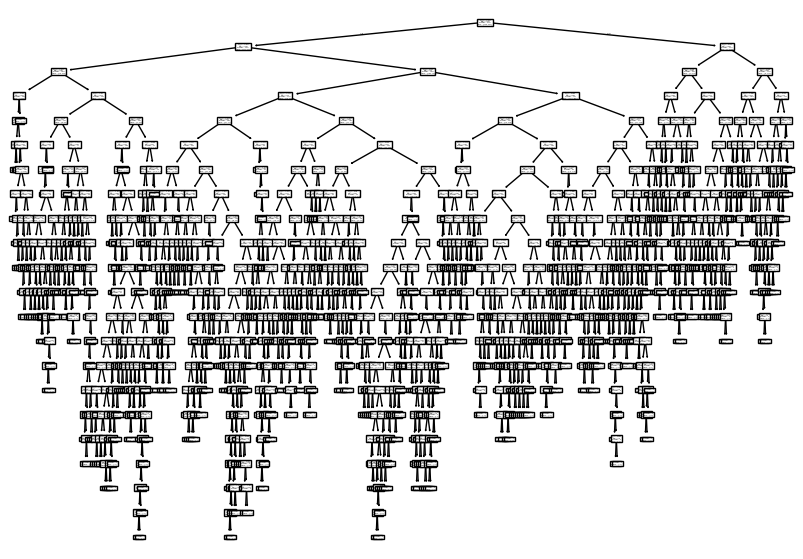

테스트 조건, 불순도, 총 샘플 수, 클래스별 샘플 수


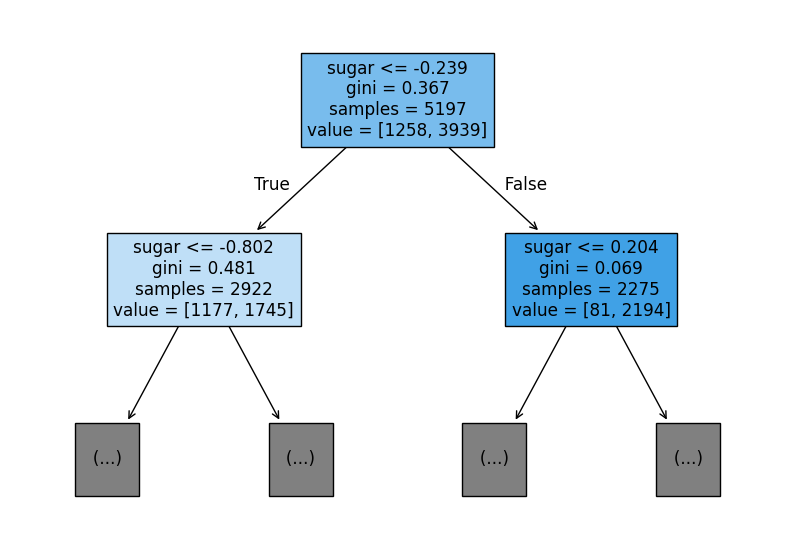

[0.23101011 0.52164748 0.24734241]


In [22]:
wine = pd.read_csv('https://bit.ly/wine_csv_data')
#wine.head()
# 각 데이터프레임의 데이터 타입과 누락된 데이터 확인 가능, 데이터 상에선 누락값 없음
print(wine.info())
print("-----------------------------")
# 각 클래스별 최소, 최대, 평균값 확인 가능
# 각 클래스별로 스케일이 다르다는 것을 확인 가능, 특성 표준화하기
print(wine.describe())

#사이킷런 모델은 이차원이여서 이중괄호
data=wine[['alcohol', 'sugar', 'pH']]
target = wine['class']
# 테스트 비율 20%
train_input, test_input, train_target, test_target = train_test_split(data,target, test_size=0.2,random_state=42)
print("-----------------------------")

ss=StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

lr= LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))
print(lr.coef_, lr.intercept_)
print("-----------------------------")

"""
결정 트리 이용
"""
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))
#트리 시각화
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

plt.figure(figsize=(10,7))
# 최대 깊이=1, filled=클래스별로 색 구분, feature_names= 특성 이름 전달
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
# 지니 불순도 = 데이터 분할 기준 정함
print("테스트 조건, 불순도, 총 샘플 수, 클래스별 샘플 수")
plt.show()

# 각 클래스별 중요도(당도가 가장 높음)
print(dt.feature_importances_)